<Axes: xlabel='Percentage in Grade 10', ylabel='Salary'>

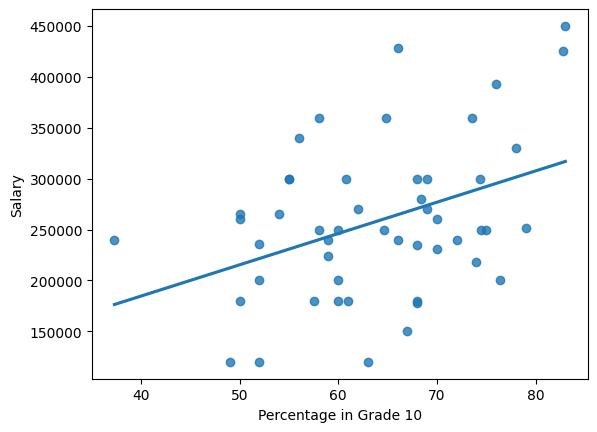

In [35]:
# Simple linear regression is a statistical technique used for finding the existence of an association relationship between a dependent variable (aka response variable or outcome variable) and an independent variable (aka explanatory variable, predictor variable or feature). We can only establish that change in the value of the outcome variable (Y) is associated with change in the value of feature X, that is, regression technique cannot be used for establishing causal relationship between two variables.

# Regression is one of the most popular supervised learning algorithms in predictive analytics. A regression model requires the knowledge of both the outcome and the feature variables in the training dataset.

# The statsmodel library is used in Python for building statistical models.

# OLS API available in statsmodel.api is used for estimation of parameters for simple linear regression model.

# The OLS() model takes two parameters Y and X. In this example, Percentage in Grade 10 will be X and Salary will be Y. OLS API available in statsmodel.api estimates only the coefficient of the X parameter. To estimate regression coefficient b0, a constant term of 1 needs to be added as a separate column. As the value of the columns remains the same across all samples, the parameter estimated for this feature or column will be the intercept term

import pandas as pd
import statsmodels.api as sm 
import matplotlib.pyplot as py
import seaborn as sn 

mba=pd.read_csv('../inputdata/MBA_Salary.csv')
X=sm.add_constant(mba['Percentage in Grade 10'])
#mba.rename(columns={'Percentage in Grade 10':'pg10'})
X.head(5)
Y=mba['Salary']
sn.regplot(x=mba['Percentage in Grade 10'],y=Y,ci=0)



In [47]:
# Splitting the dataset into training & Validating sets: 

# train_test_split() function from skelarn.model_selection module provides the ability to split the dataset randomly into training and validation datasets. The parameter train_size takes a fraction between 0 and 1 for specifying training set size. The remaining samples in the original set will be test or validation set. The samples that are selected for training and test set are randomly sampled. The method takes a seed value in a parameter named random_state, to fix which samples go to training and which ones go to the test set. 

from sklearn.model_selection import train_test_split
train_x,test_x, train_y, test_y=train_test_split(X,Y,test_size=.8,random_state=100)

train_y.head(5)


# We will fit the model using OLS method and pass train_y and train_X as parameters. 

# The fit() method on OLS() estimates the parameters and returns model information to the variable mba_ salary_lm, which contains the model parameters, accuracy measures, and residual values among other details. 

lm=sm.OLS(train_y,train_x).fit()
print(lm.params)
lm.summary2()

const                     11135.121532
Percentage in Grade 10     3822.867317
dtype: float64


/Users/i038849/Library/Python/3.9/lib/python/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  res = hypotest_fun_out(*samples, **kwds)


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Ordinary least squares
====================================================================================
Model:                     OLS                   Adj. R-squared:          0.313     
Dependent Variable:        Salary                AIC:                     253.4636  
Date:                      2024-06-16 13:45      BIC:                     254.0688  
No. Observations:          10                    Log-Likelihood:          -124.73   
Df Model:                  1                     F-statistic:             5.092     
Df Residuals:              8                     Prob (F-statistic):      0.0540    
R-squared:                 0.389                 Scale:                   4.9946e+09
------------------------------------------------------------------------------------
                         Coef.      Std.Err.    t    P>|t|     [0.025       0.975]  
------------------------------------------------------------------------------------
const                  11135.1215 102124.9025 0.1090 0.9159 -224365.3258 246635.5689
Percentage in Grade 10  3822.8673   1694.1151 2.2566 0.0540     -83.7692   7729.5039
------------------------------------------------------------------------------------
Omnibus:                     1.361              Durbin-Watson:                 2.738
Prob(Omnibus):               0.506              Jarque-Bera (JB):              0.731
Skew:                        0.155              Prob(JB):                      0.694
Kurtosis:                    1.712              Condition No.:                 276  
====================================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly
specified.
"""

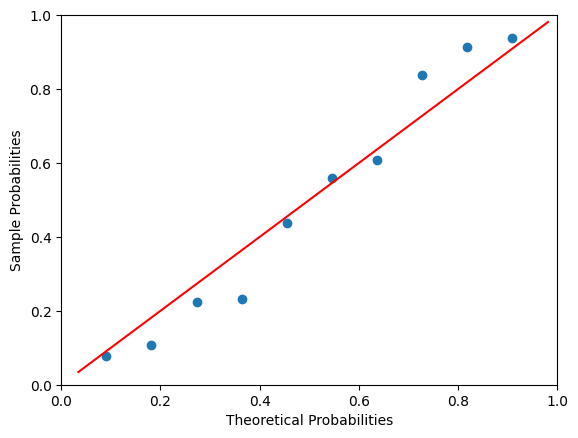

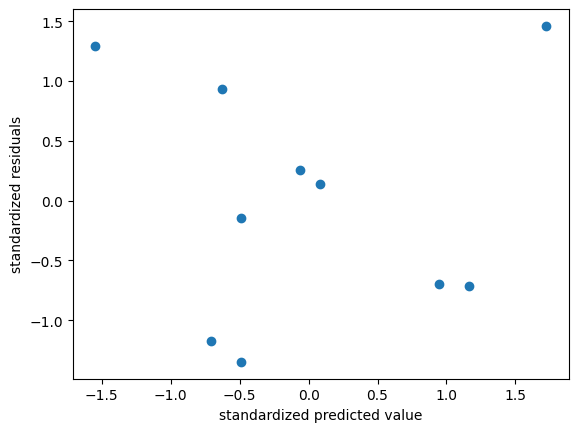

In [53]:
#  It is important to validate the regression model to ensure its validity and goodness of fit before it can be used for practical applications. The following measures are used to validate the simple linear regression models:

# 1. Co-efficient of determination (R-squared).
#R2=1-SSE/SST
#R2 should be between 0 and 1, higher the value , implies better fit.
# 2. Hypothesis test for the regression coefficient.
#verify if p value <.05 or whatever alpha you decided
# 3. Analysis of variance for overall model validity.

# 4. Residual analysis to validate the regression model assumptions.
#residulas are nomally distributed
#cummulative distribution of normal distribution is represented by line 
#cummulative distribution of residual is represented by dot. 
import matplotlib.pyplot as plt
probplot=sm.ProbPlot(lm.resid,fit=True)
probplot.ppplot(line='45')
plt.show()

#variance of residual is constant(homosedasticity), independed of x, if funnel shape then hetrosedastic
def standardizedvalue(vals):
    return (vals-vals.mean())/vals.std()

plt.scatter(standardizedvalue(lm.fittedvalues),standardizedvalue(lm.resid))
plt.xlabel("standardized predicted value")
plt.ylabel("standardized residuals")
plt.show()

# 5. Outlier analysis, since the presence of outliers can significantly impact the regression parameters.

# The primary objective of regression is to explain the variation in Y using the knowledge of X. The coefficient of determination (R-squared or R2 ) measures the percentage of variation in Y explained by the model.   The simple linear regression model can be broken into

# Variation in outcome variable explained by the model.
# Unexplained variation

